In [1]:
from sklearn.preprocessing import MultiLabelBinarizer
from numpy.random import shuffle
import pandas as pd
import nltk,string
from gensim import corpora
from numpy.random import shuffle

C:\Users\Lacey\Anaconda3\lib\site-packages\gensim\utils.py:862: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
#load reviews for wordvector training
train=pd.read_csv("wordvector_train.csv",header=0,delimiter="\t")
train.head()

,reviews
0,"When I want a sandwich, this is where I want i..."
1,I don't think I've ever had a good experience ...
2,Pretty standard Chinese food. Never had a bad...
3,This little diner is a staple in Bloomfield's ...
4,We've been to this location a few times but I'...


In [3]:
#load parsed dataset for aspect and sentiment prediction
predict=pd.read_csv("reviews+categories.csv",header=0,delimiter=",")
predict.head()

,business id,reviews,categories
0,duHFBe87uNSXImQmvBh87Q,"When I want a sandwich, this is where I want i...","['Sandwiches', 'Restaurants']"
1,SDMRxmcKPNt1AHPBKqO64Q,I don't think I've ever had a good experience ...,"['Burgers', 'Bars', 'Restaurants', 'Sports Bar..."
2,iFEiMJoEqyB9O8OUNSdLzA,Pretty standard Chinese food. Never had a bad...,"['Chinese', 'Restaurants']"
3,HmI9nhgOkrXlUr6KZGZZew,This little diner is a staple in Bloomfield's ...,"['Sandwiches', 'Restaurants', 'Italian', 'Dine..."
4,qnpvw-uQyRn9nlClWFK9aA,We've been to this location a few times but I'...,"['Chicken Wings', 'Restaurants']"


In [4]:
#load labelled aspect reviews for training 
aspect_l=pd.read_csv("labelled1.csv", header=0, delimiter=",")
#shuffle data
aspect_l = aspect_l.sample(frac=1).reset_index(drop=True)
aspect_l.head()

,Reviews,Aspects
0,refused to refund me,service
1,Really a beautiful spot,ambience
2,But the worst part(s): the lettuce on my sand...,food
3,Service is friendly and courteous,service
4,The pizza was really cold and Soggy so my gue...,food


In [5]:
#load labelled aspect reviews for training 
sentiment_l=pd.read_csv("labelled3.csv", header=0, delimiter=",")
#shuffle data
sentiment_l = sentiment_l.sample(frac=1).reset_index(drop=True)
sentiment_l.head()

,Reviews,sentiment
0,"Very cool neighborhood charming ""dive"" bar wit...",Positive
1,"Neat and tidy, good and quick customer servic...",Positive
2,"Before I get into the food, the service at Cuc...",Positive
3,This is a deli that does stand out among the ...,Positive
4,We waited nearly 40 minutes for our food,Negative


In [6]:
#convert labels into the form of "list of list"
labels1=[str(item["Aspects"]).split(",") for index, item in aspect_l.iterrows()]
labels2=[str(item["sentiment"]).split(",") for index, item in sentiment_l.iterrows()]
#create indicator matrix for labels
mlb1=MultiLabelBinarizer()
mlb2=MultiLabelBinarizer()
Y1=mlb1.fit_transform(labels1)
Y2=mlb2.fit_transform(labels2)
print("Sample label of labelled aspects")
print(Y1[0:5])
print("Sample label of labelled sentiments")
print(Y2[0:5])
#mlb1.classes_
#mlb2.classes_

Sample label of labelled aspects
[[0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]]
Sample label of labelled sentiments
[[0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 0]]


In [7]:
#tokenize reviews in wordvector_train.csv and prepare for word vector training
from gensim.models import word2vec
import logging
import pandas as pd
sentences=[ [token.strip(string.punctuation).strip() \
             for token in nltk.word_tokenize(doc) \
                 if token not in string.punctuation and \
                 len(token.strip(string.punctuation).strip())>=2]\
             for doc in train['reviews']]
print(sentences[0:2])

[['When', 'want', 'sandwich', 'this', 'is', 'where', 'want', 'it', 'from', 'Soft', 'flavorful', 'bread', 'you', 'are', 'already', 'ahead', 'of', 'the', 'game', 'because', 'Subway', 'and', 'Jimmy', 'John', 'have', 'hard', 'and/or', 'bland', 'bread', 'Fresh', 'sliced', 'meats', 'cheeses', 'and', 'veggies', 'sorry', 'but', 'JJ', 'have', 'slimy', 'meat', 'and', 'that', 'HUGE', 'turn-off', 'and', 'when', 'you', 'take', 'bite', 'of', 'your', 'sandwich', 'and', 'all', 'of', 'the', 'mayo/mustard/vinegar/oregano', 'have', 'magically', 'melded', 'together', 'you', 'll', 'be', 'believer', 'too', 'Prices', 'are', 'slightly', 'higher', 'than', 'Subway', 'pretty', 'similar', 'to', 'Jimmy', 'John', 'but', 'the', 'quality', 'leaves', 'them', 'in', 'the', 'dust', 'My', 'only', 'suggestion', 'would', 'be', 'for', 'them', 'to', 'start', 'delivery', 'service', 'or', 'subscribe', 'to', 'Grubhub.com', 'or', 'something', 'like', 'that', 'so', 'could', 'order', 'it', 'for', 'our', 'lunch', 'meetings', 'Oh', '

In [8]:
#word vector training process
# print out tracking information
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', \
                    level=logging.INFO)
EMBEDDING_DIM=200
# min_count: words with total frequency lower than this are ignored
# size: the dimension of word vector
# window: is the maximum distance 
#         between the current and predicted word 
#         within a sentence (i.e. the length of ngrams)
# workers: # of parallel threads in training
# for other parameters, check https://radimrehurek.com/gensim/models/word2vec.html
wv_model = word2vec.Word2Vec(sentences, min_count=5, \
                             size=EMBEDDING_DIM, window=5, workers=4 )

2018-04-22 13:03:03,710 : INFO : collecting all words and their counts
2018-04-22 13:03:03,715 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-04-22 13:03:04,273 : INFO : PROGRESS: at sentence #10000, processed 1003962 words, keeping 41079 word types
2018-04-22 13:03:04,840 : INFO : PROGRESS: at sentence #20000, processed 1996168 words, keeping 60409 word types
2018-04-22 13:03:05,346 : INFO : PROGRESS: at sentence #30000, processed 2980257 words, keeping 75720 word types
2018-04-22 13:03:05,817 : INFO : PROGRESS: at sentence #40000, processed 3989289 words, keeping 89728 word types
2018-04-22 13:03:05,867 : INFO : collected 90545 word types from a corpus of 4061122 raw words and 41090 sentences
2018-04-22 13:03:05,870 : INFO : Loading a fresh vocabulary
2018-04-22 13:03:06,055 : INFO : min_count=5 retains 21421 unique words (23% of original 90545, drops 69124)
2018-04-22 13:03:06,055 : INFO : min_count=5 leaves 3958990 word corpus (97% of original 40611

In [9]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

# get word vector for all words in the vocabulary

MAX_NB_WORDS=6000

# tokenizer.word_index provides the mapping 
# between a word and word index for all words
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train["reviews"])
NUM_WORDS = min(MAX_NB_WORDS, len(tokenizer.word_index))

# "+1" is for padding symbol
embedding_matrix = np.zeros((NUM_WORDS+1, EMBEDDING_DIM))

for word, i in tokenizer.word_index.items():
    # if word_index is above the max number of words, ignore it
    if i >= NUM_WORDS:
        continue
    if word in wv_model.wv:
        embedding_matrix[i]=wv_model.wv[word]

Using TensorFlow backend.


In [10]:
from keras.layers import Embedding, Dense, Conv1D, MaxPooling1D, \
Dropout, Activation, Input, Flatten, Concatenate
from keras.models import Model
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ModelCheckpoint
              
def cnn_model(FILTER_SIZES, \
              # filter sizes as a list
              MAX_NB_WORDS, \
              # total number of words
              MAX_DOC_LEN, \
              # max words in a doc
              NUM_OUTPUT_UNITS=1, \
              # number of output units
              EMBEDDING_DIM=200, \
              # word vector dimension
              NUM_FILTERS=64, \
              # number of filters for all size
              DROP_OUT=0.5, \
              # dropout rate
              PRETRAINED_WORD_VECTOR=embedding_matrix,\
              # Whether to use pretrained word vectors
              LAM=0.01):            
              # regularization coefficient
    
    main_input = Input(shape=(MAX_DOC_LEN,), \
                       dtype='int32', name='main_input')
    
    if PRETRAINED_WORD_VECTOR is not None:
        embed_1 = Embedding(input_dim=MAX_NB_WORDS+1, \
                        output_dim=EMBEDDING_DIM, \
                        input_length=MAX_DOC_LEN, \
                        weights=[PRETRAINED_WORD_VECTOR],\
                        trainable=False,\
                        name='embedding')(main_input)
    else:
        embed_1 = Embedding(input_dim=MAX_NB_WORDS+1, \
                        output_dim=EMBEDDING_DIM, \
                        input_length=MAX_DOC_LEN, \
                        name='embedding')(main_input)
    # add convolution-pooling-flat block
    conv_blocks = []
    for f in FILTER_SIZES:
        conv = Conv1D(filters=NUM_FILTERS, kernel_size=f, \
                      activation='relu', name='conv_'+str(f))(embed_1)
        conv = MaxPooling1D(MAX_DOC_LEN-f+1, name='max_'+str(f))(conv)
        conv = Flatten(name='flat_'+str(f))(conv)
        conv_blocks.append(conv)

    z=Concatenate(name='concate')(conv_blocks)
    drop=Dropout(rate=DROP_OUT, name='dropout')(z)

    dense = Dense(192, activation='relu',\
                    kernel_regularizer=l2(LAM),name='dense')(drop)
    preds = Dense(NUM_OUTPUT_UNITS, activation='sigmoid', name='output')(dense)
    model = Model(inputs=main_input, outputs=preds)
    
    model.compile(loss="binary_crossentropy", \
              optimizer="adam", metrics=["accuracy"]) 
    
    return model

#name best models
BEST_MODEL_FILEPATH1="best_model1"
BEST_MODEL_FILEPATH2="best_model2"

66053
[('when', 11116), ('i', 104694), ('want', 4042), ('a', 111798), ('sandwich', 4041)]


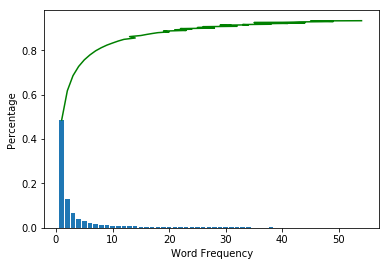

In [12]:
# Hyperparameters
# Define MAX_NB_WORDS  
# Set MAX_NB_WORDS to include words that appear at least K times

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# total number of words
total_nb_words=len(tokenizer.word_counts)
print(total_nb_words)

print(list(tokenizer.word_counts.items())[0:5])
# put word and its counts into a data frame
word_counts=pd.DataFrame(\
            list(tokenizer.word_counts.items()), \
            columns=['word','count'])
word_counts.head(3)

# get histogram of word counts
# after reset index, "index" column 
# is the word frequency
# "count" column gives how many words appear at 
# a specific frequency
df=word_counts['count'].value_counts().reset_index()
df.head(3)

# convert absolute counts to precentage
df['percent']=df['count']/len(tokenizer.word_counts)
# get cumulative percentage
df['cumsum']=df['percent'].cumsum()
df.head(5)

# plot the chart
# then we decided to set MAX_NB_WORDS=2000
plt.bar(df["index"].iloc[0:50], df["percent"].iloc[0:50])
plt.plot(df["index"].iloc[0:50], df['cumsum'].iloc[0:50], c='green')

plt.xlabel('Word Frequency')
plt.ylabel('Percentage')
plt.show()

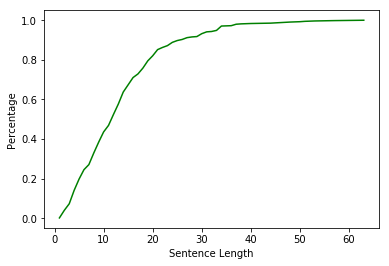

In [15]:
# Define MAX_DOC_LEN 
# Set MAX_DOC_LEN to include complete sentences as many as possible

# create a series based on the length of all sentences
sequences_aspect = tokenizer.texts_to_sequences(aspect_l["Reviews"])
sen_len=pd.Series([len(item) for item in sequences_aspect])

# create histogram of sentence length
# the "index" is the sentence length
# "counts" is the count of sentences at a length
df=sen_len.value_counts().reset_index().sort_values(by='index')
df.columns=['index','counts']
df.head(3)

# sort by sentence length
# get percentage and cumulative percentage

df=df.sort_values(by='index')
df['percent']=df['counts']/len(sen_len)
df['cumsum']=df['percent'].cumsum()
df.head(3)

# From the plot, 90% sentences have length<30, and for both aspect and sentiment dataset the plot performence is alike
# so we decided to set MAX_DOC_LEN=30 
plt.plot(df["index"], df['cumsum'], c='green')

plt.xlabel('Sentence Length')
plt.ylabel('Percentage')
plt.show()

In [16]:
#Fit aspect model using pretrained word vectors

from sklearn.model_selection import train_test_split

# set the number of output units
NUM_OUTPUT_UNITS=len(mlb1.classes_)

FILTER_SIZES=[2,3,4]

BTACH_SIZE = 64
NUM_EPOCHES = 100

# With well trained word vectors, sample size can be reduced
# We used 400 labeled aspect reviews
# split dataset into train (70%) and test sets (30%)
MAX_DOC_LEN=30
#sequences_aspect = tokenizer.texts_to_sequences(aspect_l["Reviews"])
padded_sequences_aspect = pad_sequences(sequences_aspect, \
                                 maxlen=MAX_DOC_LEN, \
                                 padding='post', \
                                 truncating='post')
#

#
X_train, X_test, Y_train, Y_test = train_test_split(\
                padded_sequences_aspect[0:546], Y1[0:546], \
                test_size=0.3, random_state=0)

# create the model with embedding matrix
model=cnn_model(FILTER_SIZES, MAX_NB_WORDS, \
                MAX_DOC_LEN, NUM_OUTPUT_UNITS, \
                PRETRAINED_WORD_VECTOR=embedding_matrix)

earlyStopping=EarlyStopping(monitor='val_loss', patience=0, verbose=2, mode='min')
checkpoint = ModelCheckpoint(BEST_MODEL_FILEPATH1, monitor='val_acc', \
                             verbose=2, save_best_only=True, mode='max')
    
training=model.fit(X_train, Y_train, \
          batch_size=BTACH_SIZE, epochs=NUM_EPOCHES, \
          callbacks=[earlyStopping, checkpoint],\
          validation_data=[X_test, Y_test], verbose=2)

Train on 382 samples, validate on 164 samples
Epoch 1/100
Epoch 00000: val_acc improved from -inf to 0.80030, saving model to best_model1
2s - loss: 2.7937 - acc: 0.6780 - val_loss: 2.5318 - val_acc: 0.8003
Epoch 2/100
Epoch 00001: val_acc improved from 0.80030 to 0.84299, saving model to best_model1
0s - loss: 2.4860 - acc: 0.7683 - val_loss: 2.2529 - val_acc: 0.8430
Epoch 3/100
Epoch 00002: val_acc improved from 0.84299 to 0.85823, saving model to best_model1
0s - loss: 2.2645 - acc: 0.7866 - val_loss: 2.1108 - val_acc: 0.8582
Epoch 4/100
Epoch 00003: val_acc improved from 0.85823 to 0.86128, saving model to best_model1
0s - loss: 2.0940 - acc: 0.8266 - val_loss: 1.9906 - val_acc: 0.8613
Epoch 5/100
Epoch 00004: val_acc improved from 0.86128 to 0.86585, saving model to best_model1
0s - loss: 1.9684 - acc: 0.8541 - val_loss: 1.9143 - val_acc: 0.8659
Epoch 6/100
Epoch 00005: val_acc improved from 0.86585 to 0.86738, saving model to best_model1
0s - loss: 1.8545 - acc: 0.8704 - val_loss

In [15]:
# evaluate the accuracy of aspect CNN model
scores_1 = model.evaluate(padded_sequences_aspect, Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores_1[1]*100))

acc: 96.84%


In [18]:
#Fit sentiment model using pretrained word vectors

# set the number of output units
# as the number of classes
from sklearn.model_selection import train_test_split
NUM_OUTPUT_UNITS_1=len(mlb2.classes_)

FILTER_SIZES=[2,3,4]

BTACH_SIZE = 64
NUM_EPOCHES = 100

# With well trained word vectors, sample size can be reduced
# We use our 450 labeled sentiment reviews
# split dataset into train (70%) and test sets (30%)
MAX_DOC_LEN=30
sequences_sentiment = tokenizer.texts_to_sequences(sentiment_l["Reviews"])
padded_sequences_sentiment = pad_sequences(sequences_sentiment, \
                                 maxlen=MAX_DOC_LEN, \
                                 padding='post', \
                                 truncating='post')

#sequences_2 = tokenizer.texts_to_sequences(predict[1])
#padded_sequences_2 = pad_sequences(sequences_2, \
                                 #maxlen=MAX_DOC_LEN, \
                                 #padding='post', \
                                 #truncating='post')

X_train_1, X_test_1, Y_train_1, Y_test_1 = train_test_split(\
                padded_sequences_sentiment[0:410], Y2[0:410], \
                test_size=0.3, random_state=0)

# create the model with embedding matrix
model_1=cnn_model(FILTER_SIZES, MAX_NB_WORDS, \
                MAX_DOC_LEN, NUM_OUTPUT_UNITS_1, \
                PRETRAINED_WORD_VECTOR=embedding_matrix)

earlyStopping_1=EarlyStopping(monitor='val_loss', patience=0, verbose=2, mode='min')
checkpoint_1 = ModelCheckpoint(BEST_MODEL_FILEPATH2, monitor='val_acc', \
                             verbose=2, save_best_only=True, mode='max')
    
training_1=model_1.fit(X_train_1, Y_train_1, \
          batch_size=BTACH_SIZE, epochs=NUM_EPOCHES, \
          callbacks=[earlyStopping_1, checkpoint_1],\
          validation_data=[X_test_1, Y_test_1], verbose=2)

Train on 287 samples, validate on 123 samples
Epoch 1/100
Epoch 00000: val_acc improved from -inf to 0.62195, saving model to best_model2
0s - loss: 2.8678 - acc: 0.5418 - val_loss: 2.5441 - val_acc: 0.6220
Epoch 2/100
Epoch 00001: val_acc did not improve
0s - loss: 2.5571 - acc: 0.6481 - val_loss: 2.5231 - val_acc: 0.5894
Epoch 3/100
Epoch 00002: val_acc improved from 0.62195 to 0.65041, saving model to best_model2
0s - loss: 2.4674 - acc: 0.6794 - val_loss: 2.3825 - val_acc: 0.6504
Epoch 4/100
Epoch 00003: val_acc did not improve
0s - loss: 2.3259 - acc: 0.6934 - val_loss: 2.3155 - val_acc: 0.6301
Epoch 5/100
Epoch 00004: val_acc improved from 0.65041 to 0.67886, saving model to best_model2
0s - loss: 2.1631 - acc: 0.7822 - val_loss: 2.2354 - val_acc: 0.6789
Epoch 6/100
Epoch 00005: val_acc did not improve
0s - loss: 2.0263 - acc: 0.8240 - val_loss: 2.1632 - val_acc: 0.6626
Epoch 7/100
Epoch 00006: val_acc improved from 0.67886 to 0.69512, saving model to best_model2
0s - loss: 1.924

In [19]:
# evaluate the accuracy of sentiment CNN model
scores_2 = model_1.evaluate(padded_sequences_sentiment, Y2, verbose=0)
print("%s: %.2f%%" % (model_1.metrics_names[1], scores_2[1]*100))

acc: 91.47%


In [20]:
# Pad reviews for prediction
sequences_1 = tokenizer.texts_to_sequences(predict["reviews"])
padded_sequences_1 = pad_sequences(sequences_1, \
                                 maxlen=MAX_DOC_LEN, \
                                 padding='post', \
                                 truncating='post')

In [21]:
# check model configuration
print("model configuration of aspect model")
print(model.summary())
print("\n")
print("model configuration of sentiment model")
print(model_1.summary())

model configuration of aspect model
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
main_input (InputLayer)          (None, 30)            0                                            
____________________________________________________________________________________________________
embedding (Embedding)            (None, 30, 200)       1200200     main_input[0][0]                 
____________________________________________________________________________________________________
conv_2 (Conv1D)                  (None, 29, 64)        25664       embedding[0][0]                  
____________________________________________________________________________________________________
conv_3 (Conv1D)                  (None, 28, 64)        38464       embedding[0][0]                  
_______________________________________________________

In [22]:
# Performance evaluation of aspect CNN
# Let's use samples[0:400]
# as an evaluation set
from sklearn.metrics import classification_report
pred_1=model.predict(X_test)

Y_pred_1=np.matrix(pred_1)
Y_pred_1=np.where(Y_pred_1>0.3,1,0)
#Y1=np.array(Y1)

#Y_pred_1[0:10]
#Y1[100:110]

#y = map(lambda x: int(x), y)
#answer = map(lambda x: int(x), answer)
print(classification_report(Y_test, Y_pred_1, target_names=mlb1.classes_))

             precision    recall  f1-score   support

   ambience       0.72      0.62      0.67        21
       food       0.83      0.89      0.86        95
      price       0.85      0.61      0.71        18
    service       0.89      0.55      0.68        31

avg / total       0.83      0.76      0.79       165



In [23]:
# Performance evaluation of sentiment CNN
# Let's use samples[0:400]
# as an evaluation set
from sklearn.metrics import classification_report
pred_2=model_1.predict(X_test_1)

Y_pred_2=np.matrix(pred_2)
Y_pred_2=np.where(Y_pred_2>0.5,1,0)
#Y=np.array(Y)

#Y_pred_2[0:10]
#Y2[100:110]

#y = map(lambda x: int(x), y)
#answer = map(lambda x: int(x), answer)
print(classification_report(Y_test_1, Y_pred_2, target_names=mlb2.classes_))

             precision    recall  f1-score   support

   Negative       0.76      0.50      0.60        50
   Positive       0.73      0.89      0.80        73

avg / total       0.74      0.73      0.72       123



In [24]:
errors_a=[]
for idx, row in enumerate(Y_test):
    if set(row) != set(Y_pred_1[idx]):
        errors_a.append((idx, row, Y_pred_1[idx]))
print(errors_a)

#[i for i, j in zip(a, b) if i == j]

[(0, array([0, 0, 0, 1]), array([0, 0, 0, 0])), (2, array([0, 0, 0, 1]), array([0, 0, 0, 0])), (14, array([0, 1, 0, 0]), array([0, 0, 0, 0])), (18, array([0, 1, 0, 0]), array([0, 0, 0, 0])), (33, array([0, 0, 0, 1]), array([0, 0, 0, 0])), (38, array([0, 0, 0, 1]), array([0, 0, 0, 0])), (49, array([0, 0, 0, 1]), array([0, 0, 0, 0])), (55, array([0, 1, 0, 0]), array([0, 0, 0, 0])), (56, array([0, 1, 0, 0]), array([0, 0, 0, 0])), (61, array([0, 0, 1, 0]), array([0, 0, 0, 0])), (64, array([0, 1, 0, 0]), array([0, 0, 0, 0])), (67, array([0, 1, 0, 0]), array([0, 0, 0, 0])), (80, array([0, 1, 0, 0]), array([0, 0, 0, 0])), (88, array([0, 0, 0, 1]), array([0, 0, 0, 0])), (111, array([0, 1, 0, 0]), array([0, 0, 0, 0])), (112, array([0, 1, 0, 0]), array([0, 0, 0, 0])), (140, array([1, 0, 1, 0]), array([0, 0, 0, 0])), (149, array([1, 0, 0, 0]), array([0, 0, 0, 0])), (155, array([0, 1, 0, 0]), array([0, 0, 0, 0])), (159, array([1, 0, 0, 0]), array([0, 0, 0, 0]))]


In [25]:
errors=[]
for idx, row in enumerate(Y_test_1):
    if set(row) != set(Y_pred_2[idx]):
        errors.append((idx, row, Y_pred_2[idx]))
print(errors)

#[i for i, j in zip(a, b) if i == j]

[(73, array([1, 0]), array([0, 0]))]


In [29]:
#Predict the unlabelled dataset with aspects, and save the result into a csv file
pred_11=model.predict(padded_sequences_1[0:])

#we chose a threshold of 0.3, because at 30% probability, every review can have a label, and some aspects that 
#could be mentioned but not mentioned a lot in the review could be reflected
Y_pred_11=np.matrix(pred_11)
Y_pred_11=np.where(Y_pred_11>0.3,1,0)

#name of each column
print(mlb1.classes_)
print(Y_pred_11[0:200])

result_1 = pd.DataFrame(Y_pred_11)
result_1.to_csv('output1.csv')

['ambience' 'food' 'price' 'service']
[[0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]
 [1 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [1 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 0 0]
 [0 0 0 0]
 [1 0 0 0]
 [0 1 0 0]
 [1 0 0 0]
 [0 0 0 1]
 [0 0 0 1]
 [0 0 0 1]
 [0 1 0 0]
 [0 0 0 1]
 [0 1 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]
 [0 0

In [31]:
#Predict the unlabelled dataset with sentiments, and save the result into a csv file
pred_12=model_1.predict(padded_sequences_1[0:])
Y_pred_12=np.matrix(pred_12)
#print(Y_pred_12)

#Because each review can only have a sentiment as a whole, we chose sentiment with the highest probability for each reveiw 
#as its representitive sentiment. And the highest probability is converted to 1, others 0.
print(mlb2.classes_)
print((Y_pred_12 == Y_pred_12.max(axis=1)).astype(float))

result_2 = pd.DataFrame((Y_pred_12 == Y_pred_12.max(axis=1)).astype(float))
result_2.to_csv('output2.csv')

['Negative' 'Positive']
[[ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]
 ..., 
 [ 0.  1.]
 [ 0.  1.]
 [ 0.  1.]]
